Let's load our data and do a little feature engineering/cleanup to make it easier to graph

In [1]:
import pandas as pd

AAPL = '/kaggle/input/apple-stock-market-data-19802024/AAPL_historical_data.csv'
df = pd.read_csv(filepath_or_buffer=AAPL,)
df['date'] = df['Date'].apply(func=lambda x: str(x).split(sep=' ')[0])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head()

,Date,Open,High,Low,Close,date,year
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,1980-12-12,1980
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,1980-12-15,1980
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,1980-12-16,1980
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,1980-12-17,1980
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,1980-12-18,1980


What do our price correlations look like? Over a long timeframe we expect the daily price correlations to be nearly 1.0 regardless of how much the prices have moved, as daily price changes tend to be essentially random. But we don't expect any of the interprice correlations to be 1.0 unless we have duplicate data.

In [2]:
df[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999947,0.999946,0.999885
High,0.999947,1.000000,0.999929,0.999947
Low,0.999946,0.999929,1.000000,0.999946
Close,0.999885,0.999947,0.999946,1.000000


Surprisingly the high/low correlations are lower than the open/close correlations.

Let's look at the prices over time.

<Axes: xlabel='date', ylabel='Close'>

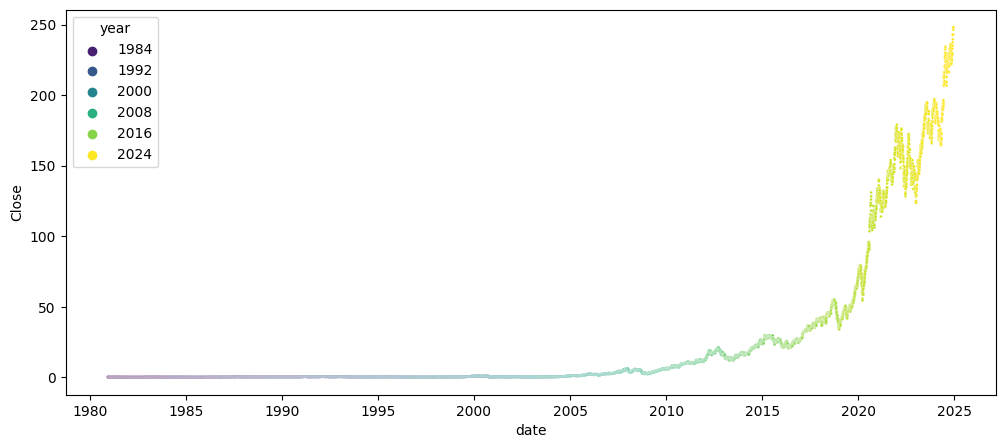

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='date', y='Close', hue='year', palette='viridis', s=4)

This stock has appreciated so much over the latter third or so of the period of interest that the first two-thirds looks flat. We should probably use a log plot in the price direction.

<Axes: xlabel='date', ylabel='Close'>

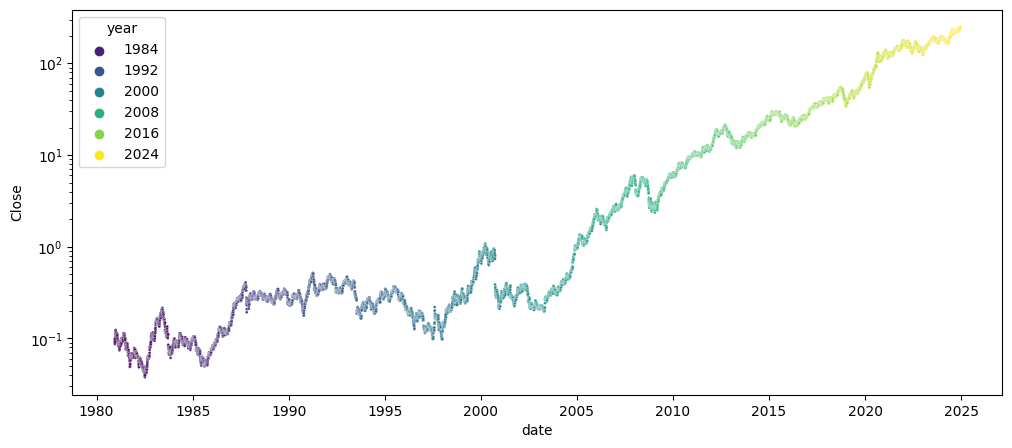

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='date', y='Close', hue='year', palette='viridis', s=4)

It's crazy how much the story of AAPL is a tale of two companies: the pre-2004 company, which in retrospect seems to have traded in a range for a quarter of a century, and the post-2004 company.